In [1]:
from client import *

test_client = Client(2)
test_client.get_label()

Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt


array([[0.04, 0.47],
       [0.04, 0.47]])

In [2]:
import mne as mne
import numpy as np
import pandas as pd
import torch as torch

data_root_dir = '/home/dhz/bci-data/ds003478-download/'

sub_name = "sub-{0:0=3d}".format(38)
file_dir = data_root_dir + sub_name + '/eeg/' + sub_name + '_task-Rest_run-01_eeg.set'
data = mne.io.read_raw_eeglab(file_dir)

data.pick_channels(['C3', 'CZ', 'C4'])
signals, times = data.get_data(return_times = True)

seg = data.annotations
dataframe = seg.to_data_frame()
newframe = dataframe.groupby(dataframe.description)

Reading /home/dhz/bci-data/ds003478-download/sub-038/eeg/sub-038_task-Rest_run-01_eeg.fdt


/tmp/ipykernel_1755514/1149863334.py:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_dir)


In [3]:
eves = ['3', '5']
signals = []

for i in eves:
    temp = newframe.get_group(i)
    head = temp.head(1).index[0]
    start = seg[head]['onset']
    signal = data.copy().crop(tmin=start, tmax=start + 1024 * 16 * 0.002 - 0.002)
    signal = signal.get_data(return_times = False)

    signals.append(signal)

signals = np.array(signals)

results = []

for eve in signals:
    results.append(eve.reshape((3, 128, 128)))
results = np.array(results)
res = np.array(results)

labels = pd.read_csv('/home/dhz/bci-data/ds003478-download/participants.tsv', sep='\t', header=0)
col = labels.columns
col = col[[0, 1, 2, 3, 6, 7, 8]]
labels = labels.drop(col, axis=1)

labels = np.array([labels, labels])
labels[:, 37] = 0.

In [4]:
labels

array([[[ 0., 23.],
        [ 4., 47.],
        [ 7., 44.],
        [ 1., 27.],
        [ 1., 23.],
        [ 1., 26.],
        [ 0., 22.],
        [ 5., 37.],
        [ 5., 36.],
        [ 0., 28.],
        [ 0., 23.],
        [ 1., 36.],
        [ 6., 40.],
        [ 3., 28.],
        [ 2., 24.],
        [ 0., 30.],
        [ 1., 30.],
        [ 3., 38.],
        [ 2., 30.],
        [ 0., 30.],
        [ 1., 31.],
        [ 1., 33.],
        [ 0., 27.],
        [ 1., 34.],
        [ 1., 33.],
        [ 1., 42.],
        [ 2., 24.],
        [ 5., 37.],
        [ 2., 36.],
        [ 2., 37.],
        [ 2., 37.],
        [ 0., 32.],
        [ 0., 27.],
        [ 1., 38.],
        [ 0., 29.],
        [ 0., 36.],
        [ 1., 30.],
        [ 0.,  0.],
        [ 0., 34.],
        [ 5., 29.],
        [ 2., 29.],
        [ 3., 38.],
        [ 2., 33.],
        [ 1., 26.],
        [ 2., 27.],
        [ 2., 26.],
        [ 4., 34.],
        [ 1., 38.],
        [ 1., 29.],
        [ 2., 35.],


In [5]:
from model import *

start(10)

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Reading /h

Epoch [1/10]:  10%|███████                                                               | 3/30 [00:07<01:06,  2.47s/it]


KeyboardInterrupt: 

In [ ]:
from model import *

start(30)

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Reading /h

Epoch [18/30]:  37%|████████████████▌                            | 11/30 [00:22<00:37,  1.97s/it, acc=0.273, loss=0.205]

In [1]:
from model import *
mse_list, loss_list = start(100)

Reading /home/dhz/bci-data/ds003478-download/sub-001/eeg/sub-001_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-003/eeg/sub-003_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-004/eeg/sub-004_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-005/eeg/sub-005_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-006/eeg/sub-006_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-007/eeg/sub-007_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-008/eeg/sub-008_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-009/eeg/sub-009_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-010/eeg/sub-010_task-Rest_run-01_eeg.fdt
Reading /home/dhz/bci-data/ds003478-download/sub-011/eeg/sub-011_task-Rest_run-01_eeg.fdt
Reading /h

Epoch [100/100]: 100%|████████████████████████████████████████████| 30/30 [01:02<00:00,  2.09s/it, loss=0.0443, mse=1.9]


In [2]:
loss_list

[0.2804909974336624,
 0.15675631960233052,
 0.09905383661389351,
 0.07219881440202396,
 0.05922060720622539,
 0.05256031503280004,
 0.049032500758767125,
 0.047071931138634684,
 0.04579336829483509,
 0.045238727765778704,
 0.044870404961208504,
 0.0446306511759758,
 0.044532287990053494,
 0.04444080187628666,
 0.044371905426184334,
 0.044380400143563745,
 0.04434206957618395,
 0.044299001308778924,
 0.0442560779551665,
 0.0442831735437115]

In [3]:
loss_list = [x * 100 for x in loss_list]

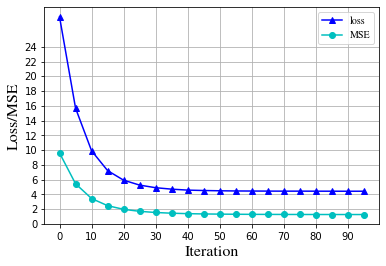

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

fontdict = {'family': 'STIXGeneral'}

iterate = range(0, 100, 10)
plt.plot(loss_list, 'b^-', mse_list, 'co-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.yticks(range(0,25,2))
plt.grid(True)
plt.legend(['Loss', 'MSE'], prop={'family': 'STIXGeneral', 'size': 16})
plt.show()

In [5]:
import json
res_dict = {'loss': loss_list, 'MSE': mse_list}

res_json=json.dumps(res_dict)

with open('enc_result.json','w+') as file:
    file.write(res_json)

In [7]:
import openpyxl

workbook = openpyxl.Workbook()

sheet = workbook.active

content

for i in list(content.values()):
    sheet.append(i)

workbook.save('enc_result.xlsx')

In [1]:
import json
with open('enc_result.json','r+') as file:
    content=file.read()
    
content=json.loads(content)

In [2]:
content

{'loss': [28.04909974336624,
  15.675631960233053,
  9.905383661389351,
  7.219881440202395,
  5.9220607206225395,
  5.256031503280004,
  4.903250075876713,
  4.707193113863468,
  4.579336829483509,
  4.52387277657787,
  4.4870404961208505,
  4.46306511759758,
  4.453228799005349,
  4.444080187628666,
  4.437190542618433,
  4.438040014356375,
  4.434206957618395,
  4.4299001308778925,
  4.42560779551665,
  4.42831735437115],
 'MSE': [9.608073620622356,
  5.434922504580269,
  3.438721943522493,
  2.46996393368269,
  1.973994831275195,
  1.7042731363636752,
  1.5458487475523726,
  1.4491318565482894,
  1.3878409220216175,
  1.3492943039086336,
  1.3248165285835662,
  1.3079529281550397,
  1.2948177269349495,
  1.2880454698965573,
  1.2817117030421892,
  1.2772145704288655,
  1.274075577997913,
  1.2720944088185206,
  1.2702344494483744,
  1.268551613545666]}

In [3]:
loss_list = content['loss']

In [4]:
mse_list = content['MSE']

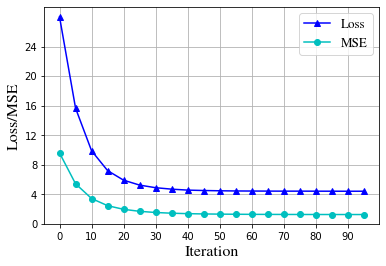

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

fontdict = {'family': 'STIXGeneral'}

iterate = range(0, 100, 10)
plt.plot(loss_list, 'b^-', mse_list, 'co-')
plt.xlabel("Iteration", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.ylabel("Loss/MSE", fontdict={'family': 'STIXGeneral', 'size': 16})
plt.xticks(range(0,20,2), iterate)
plt.yticks(range(0,25,4))
plt.grid(True)
plt.legend(['Loss', 'MSE'], prop={'family': 'STIXGeneral', 'size': 13})
plt.show()

In [1]:
from data import *
sig, label = DataExtract(2).extract()
sig.shape

Reading /home/dhz/bci-data/ds003478-download/sub-002/eeg/sub-002_task-Rest_run-01_eeg.fdt


torch.Size([2, 3, 128, 128])